In [2]:
%matplotlib notebook
import pandas as pd
#from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
country_data = "/Users/shilpa/Desktop/Boringppl_project/WasteManagement/Data/country_level_data_0.csv"
country_data_df = pd.read_csv(country_data, encoding = 'utf-8')
#country_data_df


In [4]:
Treatment = country_data_df[['country_name', 
                             'income_id',
                       'waste_treatment_anaerobic_digestion_percent',
                       'waste_treatment_compost_percent',
                       'waste_treatment_controlled_landfill_percent',
                       'waste_treatment_incineration_percent',
                       'waste_treatment_landfill_unspecified_percent',
                       'waste_treatment_open_dump_percent', 
                       'waste_treatment_other_percent',
                       'waste_treatment_recycling_percent',
                       'waste_treatment_sanitary_landfill_landfill_gas_system_percent',
                       'waste_treatment_unaccounted_for_percent',
                       'waste_treatment_waterways_marine_percent']]
Treatment.fillna(0).set_index('country_name').head(3)

,income_id,waste_treatment_anaerobic_digestion_percent,waste_treatment_compost_percent,waste_treatment_controlled_landfill_percent,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent
country_name,,,,,,,,,,,,
Aruba,HIC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,89.0,0.0
Afghanistan,LIC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Angola,LMC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
Treatment_LIC = Treatment.groupby('income_id').get_group('LIC').fillna(0).drop_duplicates().set_index('country_name')
df1 = Treatment_LIC.sum(axis=0)
df_LIC= pd.DataFrame(df1)

Treatment_LMC = Treatment.groupby('income_id').get_group('LMC').fillna(0).drop_duplicates().set_index('country_name')
df2 = Treatment_LMC.sum(axis=0)
df_LMC= pd.DataFrame(df2)

Treatment_UMC = Treatment.groupby('income_id').get_group('UMC').fillna(0).drop_duplicates().set_index('country_name')
df3 = Treatment_UMC.sum(axis=0)
df_UMC= pd.DataFrame(df3)

Treatment_HIC = Treatment.groupby('income_id').get_group('HIC').fillna(0).drop_duplicates().set_index('country_name')
df4 = Treatment_HIC.sum(axis=0)
df_HIC= pd.DataFrame(df4)

df_Treatment = pd.concat([df_LIC,df_LMC,df_UMC,df_HIC ], axis=1)
df_Treatment.columns=["LIC", "LMC", "UMC", "HIC"]
df_Treatment.index.names = ['Treatment']
df_Treatment["Total"] = df_Treatment["LIC"] + df_Treatment["LMC"] + df_Treatment["UMC"] + df_Treatment["HIC"]
df_world = df_Treatment.drop(['income_id'])

df_world["Total"] = df_world["Total"].astype(float)
df_world["Prop_LIC"] = ((df_world["LIC"] / df_world["Total"]) * 100).astype(float)
df_world["Prop_LMC"] = ((df_world["LMC"] / df_world["Total"]) * 100).astype(float)
df_world["Prop_UMC"] = ((df_world["UMC"]/ df_world["Total"]) * 100).astype(float)
df_world["Prop_HIC"] = ((df_world["HIC"]/ df_world["Total"]) * 100).astype(float)
df_world


df=df_world.rename(index = {'waste_treatment_anaerobic_digestion_percent':'Anaerobic digestion',
                      'waste_treatment_compost_percent': 'Compost',
                      'waste_treatment_controlled_landfill_percent': 'Controlled landfill',
                      'waste_treatment_incineration_percent':'Incineration',
                      'waste_treatment_landfill_unspecified_percent':'Landfill unspecified',
                      'waste_treatment_open_dump_percent':'Open dump',
                      'waste_treatment_other_percent':'Other',
                      'waste_treatment_recycling_percent':'Recycling',
                      'waste_treatment_sanitary_landfill_landfill_gas_system_percent':'Sanitary & landfill & gas',
                      'waste_treatment_unaccounted_for_percent':'Unaccounted',
                      'waste_treatment_waterways_marine_percent':'Waterways & marine'})
df.reset_index()


,Treatment,LIC,LMC,UMC,HIC,Total,Prop_LIC,Prop_LMC,Prop_UMC,Prop_HIC
0,Anaerobic digestion,0,0,0.3,0.1,0.400000,0.000000,0.000000,75.000000,25.000000
1,Compost,9.67,60.54,73.47,409.707,553.386827,1.747421,10.939906,13.276427,74.036245
2,Controlled landfill,27.04,386.67,742.995,658.458,1815.163274,1.489673,21.302216,40.932693,36.275418
3,Incineration,0,2.73,41.76,1320.36,1364.850908,0.000000,0.200022,3.059675,96.740303
4,Landfill unspecified,74,421.67,871.75,1646.67,3014.090000,2.455136,13.989960,28.922494,54.632410
5,Open dump,862.7,1118.07,1327.13,417.92,3725.815151,23.154665,30.008735,35.619726,11.216874
6,Other,39.3,185.5,60.725,45.38,330.905000,11.876520,56.058385,18.351188,13.713906
7,Recycling,86.4,234.88,299.821,1532.97,2154.074172,4.011004,10.903988,13.918786,71.166222
8,Sanitary & landfill & gas,7,177.73,715.575,341.67,1241.975470,0.563618,14.310267,57.615910,27.510205
9,Unaccounted,690.19,846.75,720.348,827.992,3085.280199,22.370416,27.444833,23.347902,26.836849


In [6]:
a = df.drop(['LIC', 'LMC', 'UMC', 'HIC', 'Total'], axis=1)
b = a.T
c = b.rename(index = {'Prop_LIC':'LIC',
                 'Prop_LMC': 'LMC',
                 'Prop_UMC': 'UMC',
                 'Prop_HIC': 'HIC'})

<IPython.core.display.Javascript object>


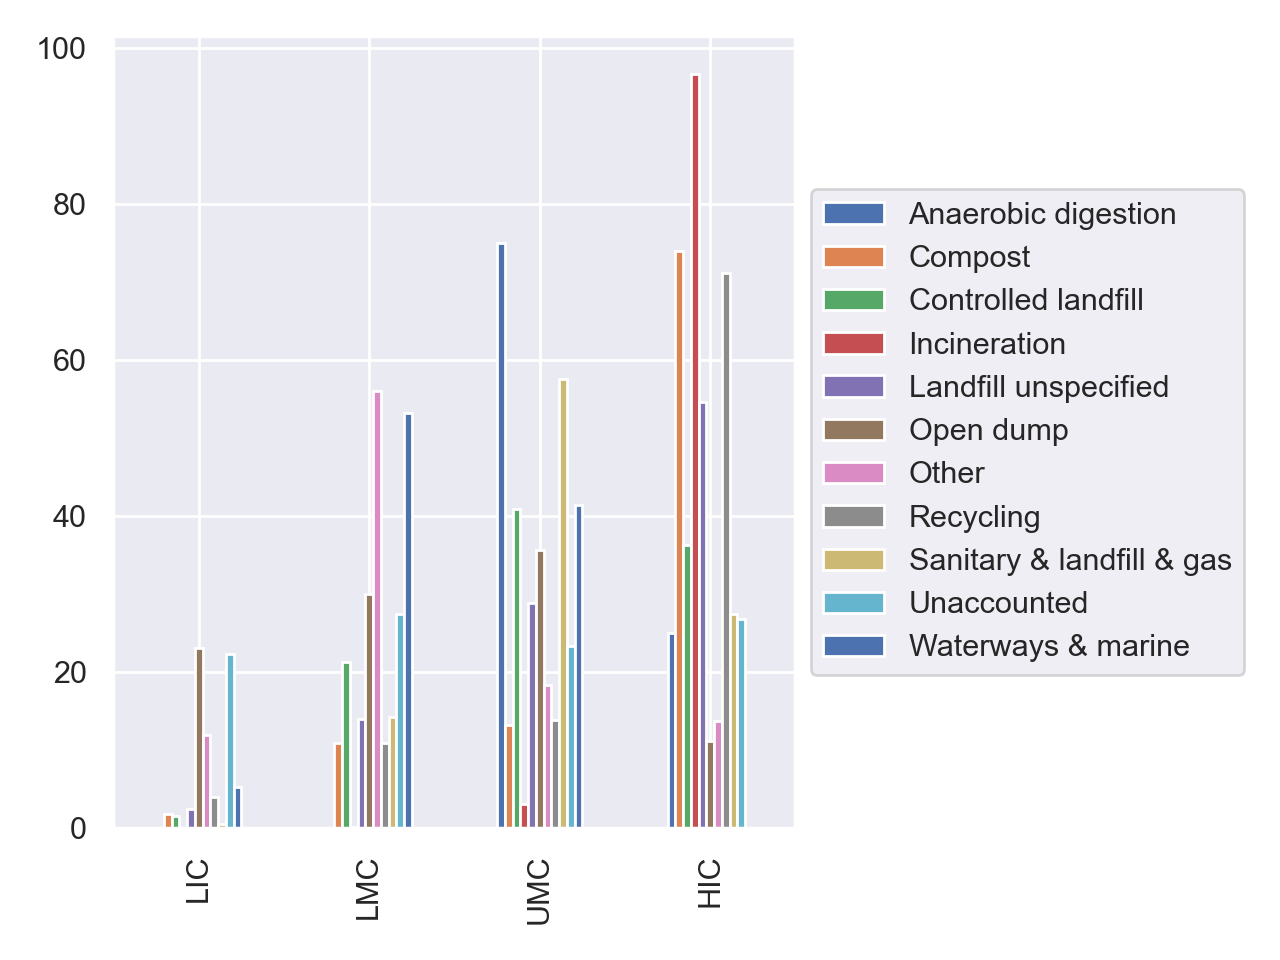

In [7]:
c.plot.bar(legend=True, stacked=False);
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


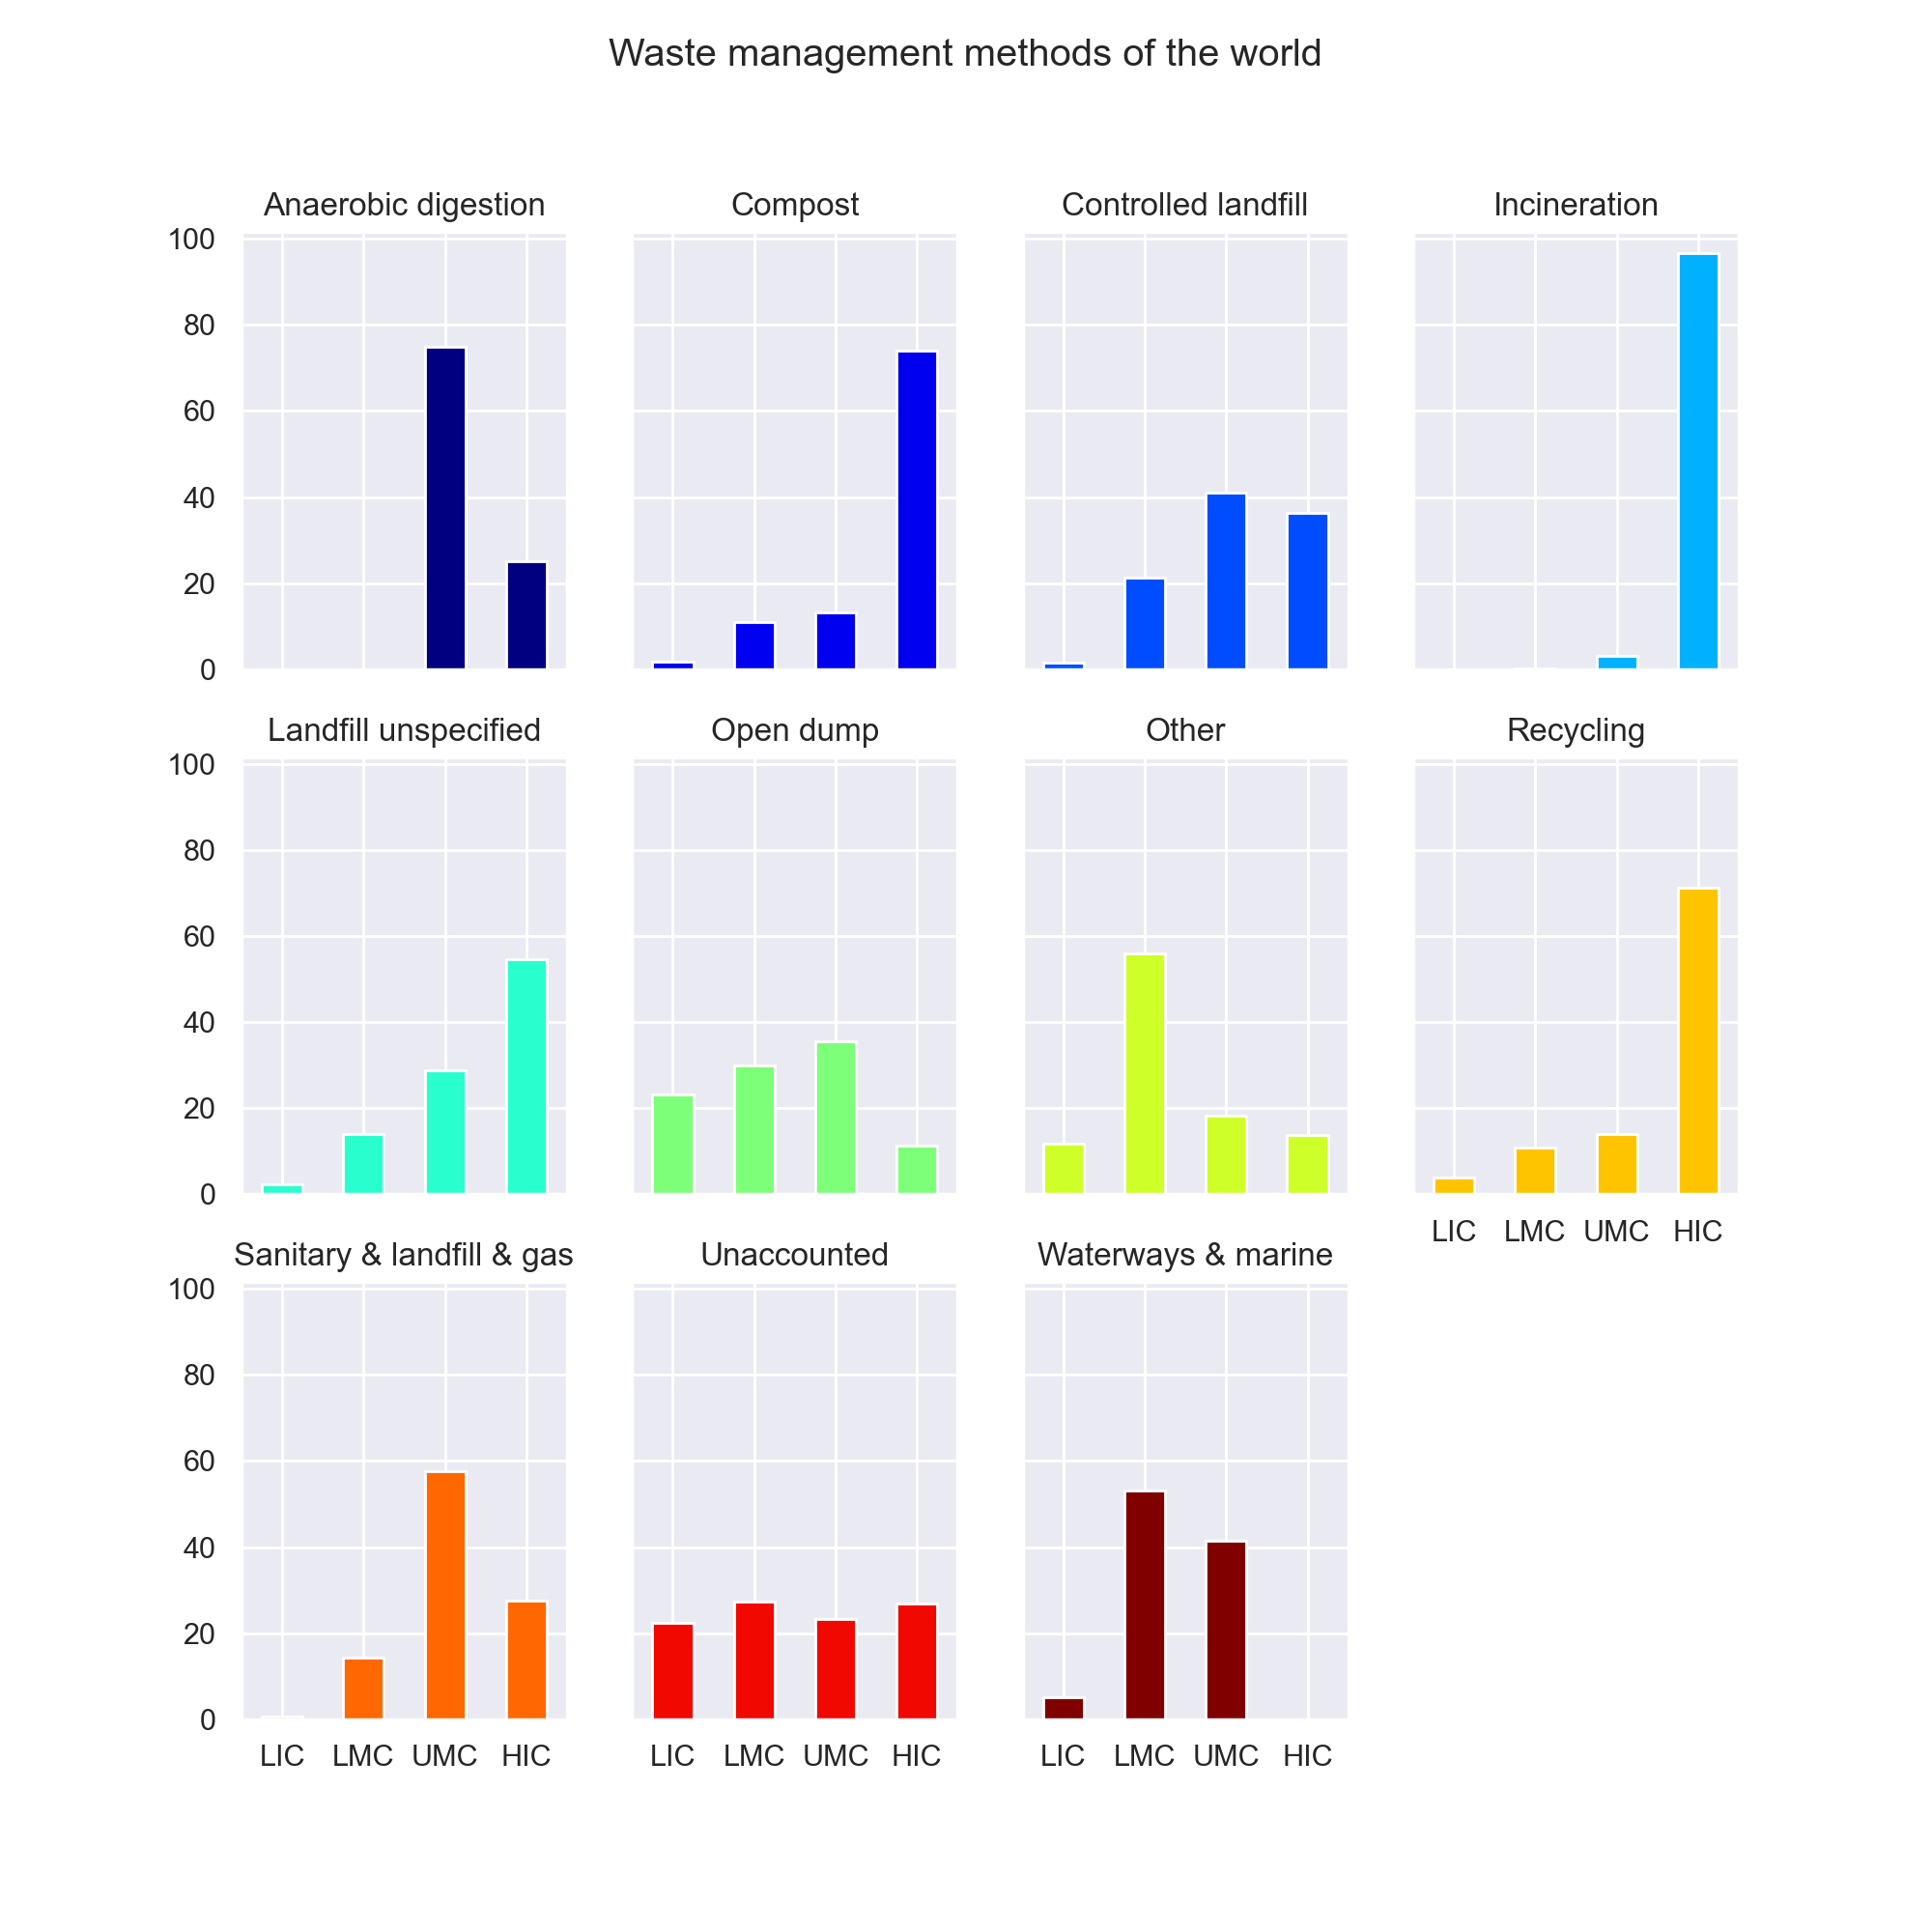

/Users/shilpa/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/shilpa/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/shilpa/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/shilpa/opt/anaconda3/lib/python3.8/site-packages/pan

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

axes = c.plot(kind='bar',rot=0,colormap='jet',legend=False, sharex=True, sharey=True, figsize=(10,10),
             title='Waste management methods of the world', subplots=True, layout=(3,4))


plt.savefig('Treatment_Subplots.png')
plt.show()

##### In the viz_waste_treatment.ipynb, data from Prop_LIC, Prop_LMC, Prop_UMC, Prop_HIC columns from the above dataframe is renamed, and converted to whole numbers for grouped bar plotting. 


# The end